In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("balanced_sentimentdataset.csv")
df.head(10)
df.shape

(452, 2)

In [3]:
df["Sentiment"].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

(-0.5, 799.5, 399.5, -0.5)

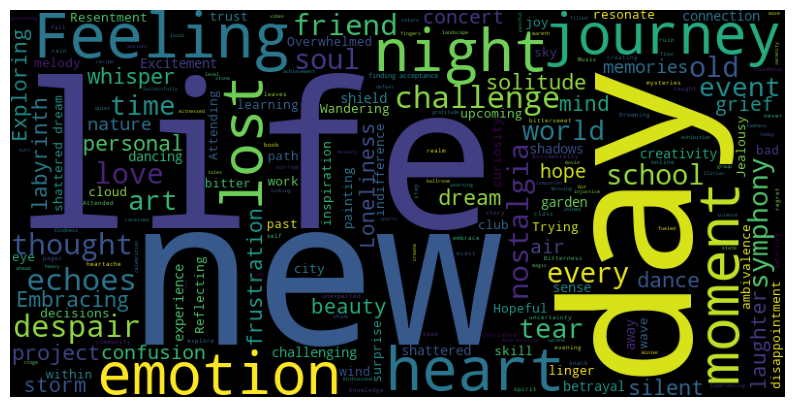

In [4]:
#Word Frequency and Text Analysis: use natural language to identify common words, phrases and topics..... tools include word cloud and tf-idf analysis

from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = df["Text"].values
text = ' '.join(text)

#create the word cloud object

wordcloud = WordCloud(width=800, height=400).generate(text)

#display the word cloud
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')

In [5]:
#clean and remove emojis, commas, urls

import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text) #remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text) #remove special characters
    text = text.encode('ascii', 'ignore').decode('ascii') #remove emojis
    return text

df["cleaned_text"] = df["Text"].apply(clean_text)

df.head(10)

,Text,Sentiment,cleaned_text
0,"Reflecting on a lifetime of memories, each wri...",Positive,Reflecting on a lifetime of memories each wrin...
1,Reflecting on the beauty of nature. ...,Positive,Reflecting on the beauty of nature ...
2,"Facing a defeat in the championship, the boxer...",Positive,Facing a defeat in the championship the boxer ...
3,Enthusiasm for learning new skills and expandi...,Positive,Enthusiasm for learning new skills and expandi...
4,"Bathed in the glow of inspiration, a creative...",Positive,Bathed in the glow of inspiration a creative ...
5,"Reflecting on life's journey, grateful for the...",Positive,Reflecting on lifes journey grateful for the l...
6,"Hopeful whispers of wind, carrying the promis...",Positive,Hopeful whispers of wind carrying the promise...
7,Fulfillment in completing a challenging worko...,Positive,Fulfillment in completing a challenging worko...
8,Hosted a photography exhibition featuring snap...,Positive,Hosted a photography exhibition featuring snap...
9,Trying out a new dessert recipe. ...,Positive,Trying out a new dessert recipe ...


In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download("stopwords")
nltk.download("punkt")

#example of tokenization

# this is a simple sentence =====> ["This, "is", "a", "simple", "sentence"]

stopwords = set(stopwords.words("english"))
stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dabeer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/dabeer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [7]:
def remove_stopwords(text):
    #tokenize the text
    words = word_tokenize(text)
    #remove the stopwords and convert all the words to lowercase
    words = [word for word in words if word.lower() not in stopwords]
    return ' '.join(words)

df["cleaned_text"] = df["cleaned_text"].apply(remove_stopwords)

df.head(10)

,Text,Sentiment,cleaned_text
0,"Reflecting on a lifetime of memories, each wri...",Positive,Reflecting lifetime memories wrinkle tells sto...
1,Reflecting on the beauty of nature. ...,Positive,Reflecting beauty nature
2,"Facing a defeat in the championship, the boxer...",Positive,Facing defeat championship boxer reflects chal...
3,Enthusiasm for learning new skills and expandi...,Positive,Enthusiasm learning new skills expanding knowl...
4,"Bathed in the glow of inspiration, a creative...",Positive,Bathed glow inspiration creative phoenix risin...
5,"Reflecting on life's journey, grateful for the...",Positive,Reflecting lifes journey grateful lessons learned
6,"Hopeful whispers of wind, carrying the promis...",Positive,Hopeful whispers wind carrying promises bright...
7,Fulfillment in completing a challenging worko...,Positive,Fulfillment completing challenging workout rou...
8,Hosted a photography exhibition featuring snap...,Positive,Hosted photography exhibition featuring snapsh...
9,Trying out a new dessert recipe. ...,Positive,Trying new dessert recipe


In [8]:
#lemmatization
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stopwords]
    return ' '.join(lemmatized_words)

df["lemmatized_text"] = df["cleaned_text"].apply(lemmatize_text)

df.head(10)

[nltk_data] Downloading package wordnet to /Users/dabeer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Text,Sentiment,cleaned_text,lemmatized_text
0,"Reflecting on a lifetime of memories, each wri...",Positive,Reflecting lifetime memories wrinkle tells sto...,reflecting lifetime memory wrinkle tell story ...
1,Reflecting on the beauty of nature. ...,Positive,Reflecting beauty nature,reflecting beauty nature
2,"Facing a defeat in the championship, the boxer...",Positive,Facing defeat championship boxer reflects chal...,facing defeat championship boxer reflects chal...
3,Enthusiasm for learning new skills and expandi...,Positive,Enthusiasm learning new skills expanding knowl...,enthusiasm learning new skill expanding knowledge
4,"Bathed in the glow of inspiration, a creative...",Positive,Bathed glow inspiration creative phoenix risin...,bathed glow inspiration creative phoenix risin...
5,"Reflecting on life's journey, grateful for the...",Positive,Reflecting lifes journey grateful lessons learned,reflecting life journey grateful lesson learned
6,"Hopeful whispers of wind, carrying the promis...",Positive,Hopeful whispers wind carrying promises bright...,hopeful whisper wind carrying promise brighter...
7,Fulfillment in completing a challenging worko...,Positive,Fulfillment completing challenging workout rou...,fulfillment completing challenging workout rou...
8,Hosted a photography exhibition featuring snap...,Positive,Hosted photography exhibition featuring snapsh...,hosted photography exhibition featuring snapsh...
9,Trying out a new dessert recipe. ...,Positive,Trying new dessert recipe,trying new dessert recipe


In [9]:
#tf idf analysis - analyzing top k words

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

x = vectorizer.fit_transform(df["lemmatized_text"])
df_idf = pd.DataFrame(x.toarray(), columns = vectorizer.get_feature_names_out())

#retain the top k words

df_idf = df_idf.sum().sort_values(ascending=False).head(20)
df_idf

life         6.826411
new          6.492691
day          5.550198
echo         5.132367
feeling      5.125246
like         4.728254
challenge    4.621630
heart        4.586154
emotion      4.576511
lost         4.353896
night        4.255852
friend       4.255692
despair      4.216235
dream        4.159790
moment       4.155597
journey      3.888508
shattered    3.812465
thought      3.785206
old          3.628745
love         3.585545
dtype: float64

In [10]:
pip install scikit-learn



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
#bigrams
from nltk import ngrams
from nltk.tokenize import word_tokenize

def generate_ngrams(text, n=2 ):
    text = word_tokenize(text)
    n_grams = ngrams(text, n)
    return [' '.join(grams) for grams in n_grams]

df["bigrams"] = df["lemmatized_text"].apply(generate_ngrams)

df.head(10)

,Text,Sentiment,cleaned_text,lemmatized_text,bigrams
0,"Reflecting on a lifetime of memories, each wri...",Positive,Reflecting lifetime memories wrinkle tells sto...,reflecting lifetime memory wrinkle tell story ...,"[reflecting lifetime, lifetime memory, memory ..."
1,Reflecting on the beauty of nature. ...,Positive,Reflecting beauty nature,reflecting beauty nature,"[reflecting beauty, beauty nature]"
2,"Facing a defeat in the championship, the boxer...",Positive,Facing defeat championship boxer reflects chal...,facing defeat championship boxer reflects chal...,"[facing defeat, defeat championship, champions..."
3,Enthusiasm for learning new skills and expandi...,Positive,Enthusiasm learning new skills expanding knowl...,enthusiasm learning new skill expanding knowledge,"[enthusiasm learning, learning new, new skill,..."
4,"Bathed in the glow of inspiration, a creative...",Positive,Bathed glow inspiration creative phoenix risin...,bathed glow inspiration creative phoenix risin...,"[bathed glow, glow inspiration, inspiration cr..."
5,"Reflecting on life's journey, grateful for the...",Positive,Reflecting lifes journey grateful lessons learned,reflecting life journey grateful lesson learned,"[reflecting life, life journey, journey gratef..."
6,"Hopeful whispers of wind, carrying the promis...",Positive,Hopeful whispers wind carrying promises bright...,hopeful whisper wind carrying promise brighter...,"[hopeful whisper, whisper wind, wind carrying,..."
7,Fulfillment in completing a challenging worko...,Positive,Fulfillment completing challenging workout rou...,fulfillment completing challenging workout rou...,"[fulfillment completing, completing challengin..."
8,Hosted a photography exhibition featuring snap...,Positive,Hosted photography exhibition featuring snapsh...,hosted photography exhibition featuring snapsh...,"[hosted photography, photography exhibition, e..."
9,Trying out a new dessert recipe. ...,Positive,Trying new dessert recipe,trying new dessert recipe,"[trying new, new dessert, dessert recipe]"


In [6]:
def parser_word_safe(text: str, k: int) -> list:
    res = []
    i = 0
    n = len(text)

    while i < n:
        end = min(i + k, n)
        chunk = text[i:end]

        # manually find last space in chunk
        if end < n and text[end] != ' ':
            last_space = -1
            for j in range(len(chunk)):
                if chunk[j] == ' ':
                    last_space = j
            if last_space != -1:
                end = i + last_space + 1
                chunk = text[i:end]

        res.append(chunk)
        i = end

    return res

parser_word_safe("my name is dabeer",7)

['my name', ' is ', 'dabeer']

In [25]:
def parser_word_safe(text: str, k: int) -> list:
    res = []
    i = 0
    n = len(text)

    while i < n:
        end = min(i + k, n) #my_n
        chunk = text[i:end]

        # if next char is not space, and we're cutting a word, backtrack
        if end != n and text[end] != ' ' and ' ' in chunk:
            # find last space inside the chunk
            j = len(chunk) - 1
            while j >= 0 and chunk[j] != ' ':
                j -= 1
            if j != -1:
                end = i + j + 1
                chunk = text[i:end]

        res.append(chunk)
        i = end

    return res


parser_word_safe("my name is dabeer",4)


['my ', 'name', ' is ', 'dabe', 'er']

In [40]:
def parser_word_safe(text: str, k: int) -> list:
    result = []
    start = 0
    n = len(text)

    while start < n:
        end = start + k
        current_chunk = text[start:end]

        # ✅ Optimization: If chunk is full length and has no spaces, no need to check
        if len(current_chunk) == k and ' ' not in current_chunk:
            result.append(current_chunk)
            start = end
            continue

        if end == n or current_chunk[-1] == ' ':
            result.append(current_chunk)
            start = end  # 12 ,, my_name_is_ga
            continue

        # ⚠️ Potential word break — check next char and backtrack if needed
        # if end != n and text[end] != ' ' and ' ' in current_chunk: ""
        # last_space = None
        for j in range(len(current_chunk) - 1, -1, -1):
            if current_chunk[j] == ' ': #xy z
                last_space = j
                break

        # if last_space is not None:
        end = start + last_space + 1  
        current_chunk = text[start:end]

        result.append(current_chunk)
        start = end

    return result


parser_word_safe("hi   there",4)
# ['hi  ', ' the', 're']
# parser_word_safe("hellothere", 5)
# Expected: ['hello', 'there']
# parser_word_safe("hi   there", 4)
# Expected: ['hi  ', ' the', 're']
# parser_word_safe("go now ", 3)
# Expected: ['go ', 'now', ' ']



['hi  ', ' ', 'ther', 'e']

In [20]:
def parser(text, k):
    res = []

    i = 0
    while i < len(text):
        res.append(text[i:i+k])
        i += k
    return res

parser(" ",4)


[' ']

In [12]:
!pip3 install transformers


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [13]:
#bert tokenization
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [14]:
import tensorflow as tf

x = df["Text"].values
y = df['Sentiment'].values
sequence = [sequence for sequence in x]

model_inputs = tokenizer(sequence, padding = True, truncation = True, max_length = 512, return_tensors = "tf")

In [15]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((model_inputs['input_ids'], y))
dataset = dataset.cache()
dataset =dataset.shuffle(1000).batch(16)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

import tensorflow as tf

total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.2 * total_size)
test_size = int(0.1 * total_size)

train = dataset.take(train_size)
val = dataset.skip(train_size).take(val_size)
test = dataset.skip(train_size + val_size).take(test_size)

MAX_SEQUENCE_LENGTH = 512

In [17]:
!pip3 install tensorflow


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [32]:
from transformers import BertTokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load the tokenizer from the `bert-base-uncased` pre-trained model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Prepare the text data
x = df['Text'].values  # The column with text inputs

# Prepare the labels
y = df['Sentiment'].values  # The column with sentiment labels
label_encoder = LabelEncoder()
y_integers = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_integers)

# Tokenize the text data
model_inputs = tokenizer(list(x), padding=True, truncation=True, max_length=512, return_tensors="tf")

# Create a TensorFlow Dataset object
dataset = tf.data.Dataset.from_tensor_slices((model_inputs['input_ids'], y_onehot))

# Shuffle, batch, and prefetch the dataset
batch_size = 16
dataset = dataset.shuffle(len(x)).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

# Calculate dataset sizes for split
total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = int(0.15 * total_size)

# Split the dataset into train, validation, and test sets
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size).take(val_size)
test_dataset = dataset.skip(train_size + val_size)

# Define the model architecture
model = Sequential(name='sentiment_analysis')
model.add(tf.keras.layers.Input(shape=(512,), dtype='int32'))  # Ensure the input layer matches BERT's output
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.vocab), output_dim=32))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Dropout(0.5))
model.add(tf.keras.layers.GlobalMaxPool1D())  # Use GlobalMaxPool1D instead of Flatten to handle variable-length sequences
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Change the output layer to match the number of classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=5e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sentiment_analysis"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_21 (Embedding)        │ (None, 512, 32)        │       976,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_21                │ (None, 512, 64)        │        16,640 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 512, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_21         │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,035,459 (3.95 MB)

 Trainable params: 1,035,459 (3.95 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
#the following model is weirdly too good

with tf.device('/GPU:0'):
    history = model.fit(train_dataset, batch_size = 16, validation_data=val_dataset, epochs=100)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3477 - loss: 1.0954 - val_accuracy: 0.2969 - val_loss: 1.0962
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3954 - loss: 1.0919 - val_accuracy: 0.3281 - val_loss: 1.0982
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4316 - loss: 1.0845 - val_accuracy: 0.4062 - val_loss: 1.0906
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3864 - loss: 1.0864 - val_accuracy: 0.4688 - val_loss: 1.0881
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4375 - loss: 1.0819 - val_accuracy: 0.4062 - val_loss: 1.0887
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4144 - loss: 1.0786 - val_accuracy: 0.3750 - val_loss: 1.0848
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4371 - loss: 1.0616 - val_accuracy: 0.5156 - val_loss: 1.0736
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3522 - loss: 1.0686 - val_accuracy: 0.343

In [34]:
#test model on test dataset

model.evaluate(test_dataset)

#things here to discuss why is our model getting so much accuracy on both training and testing?

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0203


[0.018979383632540703, 1.0]

In [35]:
# Example sample sentences to test
sample_texts = ["I absolutely love this product!", "This was a terrible experience."]

# Tokenize using the same tokenizer
sample_inputs = tokenizer(sample_texts, padding=True, truncation=True, max_length=512, return_tensors="tf")

# Use the last trained model to predict
predictions = model.predict(sample_inputs['input_ids'])

# Get class index
predicted_class_indices = np.argmax(predictions, axis=1)

# Decode back to original label names
predicted_labels = label_encoder.inverse_transform(predicted_class_indices)

for text, label in zip(sample_texts, predicted_labels):
    print(f"Text: {text}\nPredicted Sentiment: {label}\n")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Text: I absolutely love this product!
Predicted Sentiment: Neutral

Text: This was a terrible experience.
Predicted Sentiment: Negative



In [21]:
#for lemmatized text

from sklearn.model_selection import KFold
import numpy as np

# Prepare the text data
x = df['lemmatized_text'].values  # The column with text inputs
y = df['Sentiment'].values  # The column with sentiment labels

# Encoding labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

# Initialize the tokenizer from the `bert-base-uncased` pre-trained model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define the K-fold Cross Validator
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
acc_per_fold = []
loss_per_fold = []

for train_indices, val_indices in kfold.split(x):
    # Tokenize the text data for the current fold
    train_inputs = tokenizer(list(x[train_indices]), padding=True, truncation=True, max_length=512, return_tensors="tf")
    val_inputs = tokenizer(list(x[val_indices]), padding=True, truncation=True, max_length=512, return_tensors="tf")

    # Convert to TensorFlow dataset for better performance
    train_dataset = tf.data.Dataset.from_tensor_slices((train_inputs['input_ids'], y_onehot[train_indices]))
    val_dataset = tf.data.Dataset.from_tensor_slices((val_inputs['input_ids'], y_onehot[val_indices]))

    # Shuffle, batch, and prefetch the dataset
    batch_size = 16
    train_dataset = train_dataset.shuffle(len(train_indices)).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

    # Define the model architecture for the current fold
    model = Sequential(name=f'sentiment_analysis_fold_{fold_no}')
    model.add(tf.keras.layers.Input(shape=(512,), dtype='int32'))  # Ensure the input layer matches BERT's output
    model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.vocab), output_dim=32))
    model.add(Bidirectional(LSTM(32, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(tf.keras.layers.GlobalMaxPool1D())  # Use GlobalMaxPool1D instead of Flatten to handle variable-length sequences
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Change the output layer to match the number of classes

    # Compile the model for the current fold
    model.compile(optimizer=Adam(learning_rate=5e-5), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    print(f'Training model for fold {fold_no}...')
    history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

    # Generate generalization metrics
    scores = model.evaluate(val_dataset)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no += 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


Training model for fold 1...
Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.2669 - loss: 1.1006 - val_accuracy: 0.4130 - val_loss: 1.0960
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3934 - loss: 1.0964 - val_accuracy: 0.4783 - val_loss: 1.0929
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3553 - loss: 1.0954 - val_accuracy: 0.5652 - val_loss: 1.0903
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4056 - loss: 1.0917 - val_accuracy: 0.5435 - val_loss: 1.0872
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4190 - loss: 1.0860 - val_accuracy: 0.4783 - val_loss: 1.0839
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4107 - loss: 1.0833 - val_accuracy: 0.5217 - val_loss: 1.0810
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4243 - loss: 1.0808 - val_accuracy: 0.5000 - val_loss: 1.0782
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3900 - loss: 1.

In [22]:
model.evaluate(test_dataset)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6234 - loss: 1.3808  


[1.2133153676986694, 0.6617646813392639]

In [23]:
# Example sample sentences to test
sample_texts = ["I absolutely love this product!", "This was a terrible experience."]

# Tokenize using the same tokenizer
sample_inputs = tokenizer(sample_texts, padding=True, truncation=True, max_length=512, return_tensors="tf")

# Use the last trained model to predict
predictions = model.predict(sample_inputs['input_ids'])

# Get class index
predicted_class_indices = np.argmax(predictions, axis=1)

# Decode back to original label names
predicted_labels = label_encoder.inverse_transform(predicted_class_indices)

for text, label in zip(sample_texts, predicted_labels):
    print(f"Text: {text}\nPredicted Sentiment: {label}\n")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
Text: I absolutely love this product!
Predicted Sentiment: Positive

Text: This was a terrible experience.
Predicted Sentiment: Positive



In [24]:
#for cleaned text

from sklearn.model_selection import KFold
import numpy as np

# Prepare the text data
x = df["cleaned_text"].values  # The column with text inputs
y = df['Sentiment'].values  # The column with sentiment labels

# Encoding labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

# Initialize the tokenizer from the `bert-base-uncased` pre-trained model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define the K-fold Cross Validator
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
acc_per_fold = []
loss_per_fold = []

for train_indices, val_indices in kfold.split(x):
    # Tokenize the text data for the current fold
    train_inputs = tokenizer(list(x[train_indices]), padding=True, truncation=True, max_length=512, return_tensors="tf")
    val_inputs = tokenizer(list(x[val_indices]), padding=True, truncation=True, max_length=512, return_tensors="tf")

    # Convert to TensorFlow dataset for better performance
    train_dataset = tf.data.Dataset.from_tensor_slices((train_inputs['input_ids'], y_onehot[train_indices]))
    val_dataset = tf.data.Dataset.from_tensor_slices((val_inputs['input_ids'], y_onehot[val_indices]))

    # Shuffle, batch, and prefetch the dataset
    batch_size = 16
    train_dataset = train_dataset.shuffle(len(train_indices)).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

    # Define the model architecture for the current fold
    model = Sequential(name=f'sentiment_analysis_fold_{fold_no}')
    model.add(tf.keras.layers.Input(shape=(512,), dtype='int32'))  # Ensure the input layer matches BERT's output
    model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.vocab), output_dim=32))
    model.add(Bidirectional(LSTM(32, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(tf.keras.layers.GlobalMaxPool1D())  # Use GlobalMaxPool1D instead of Flatten to handle variable-length sequences
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Change the output layer to match the number of classes

    # Compile the model for the current fold
    model.compile(optimizer=Adam(learning_rate=5e-5), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    print(f'Training model for fold {fold_no}...')
    history = model.fit(train_dataset, epochs=50, validation_data=val_dataset)

    # Generate generalization metrics
    scores = model.evaluate(val_dataset)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no += 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


Training model for fold 1...
Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4085 - loss: 1.0948 - val_accuracy: 0.4066 - val_loss: 1.0957
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3773 - loss: 1.0916 - val_accuracy: 0.4066 - val_loss: 1.0941
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3901 - loss: 1.0866 - val_accuracy: 0.4066 - val_loss: 1.0925
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4243 - loss: 1.0811 - val_accuracy: 0.4066 - val_loss: 1.0910
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3561 - loss: 1.0792 - val_accuracy: 0.4725 - val_loss: 1.0893
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4069 - loss: 1.0761 - val_accuracy: 0.3626 - val_loss: 1.0877
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4539 - loss: 1.0665 - val_accuracy: 0.3407 - val_loss: 1.0864
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3604 - loss: 1.0651 

In [25]:
model.evaluate(test_dataset)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6318 - loss: 0.9628  


[1.0287048816680908, 0.5882353186607361]

In [26]:

# Use the last trained model to predict
predictions = model.predict(sample_inputs['input_ids'])

# Get class index
predicted_class_indices = np.argmax(predictions, axis=1)

# Decode back to original label names
predicted_labels = label_encoder.inverse_transform(predicted_class_indices)

for text, label in zip(sample_texts, predicted_labels):
    print(f"Text: {text}\nPredicted Sentiment: {label}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Text: I absolutely love this product!
Predicted Sentiment: Negative

Text: This was a terrible experience.
Predicted Sentiment: Neutral



In [29]:
#for cleaned text

from sklearn.model_selection import KFold
import numpy as np

# Prepare the text data
x = df["bigrams"].apply(lambda tokens: " ".join(tokens)).values
y = df['Sentiment'].values  # The column with sentiment labels

# Encoding labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

# Initialize the tokenizer from the `bert-base-uncased` pre-trained model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define the K-fold Cross Validator
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
acc_per_fold = []
loss_per_fold = []

for train_indices, val_indices in kfold.split(x):
    # Tokenize the text data for the current fold
    train_inputs = tokenizer(list(x[train_indices]), padding=True, truncation=True, max_length=512, return_tensors="tf")
    val_inputs = tokenizer(list(x[val_indices]), padding=True, truncation=True, max_length=512, return_tensors="tf")

    # Convert to TensorFlow dataset for better performance
    train_dataset = tf.data.Dataset.from_tensor_slices((train_inputs['input_ids'], y_onehot[train_indices]))
    val_dataset = tf.data.Dataset.from_tensor_slices((val_inputs['input_ids'], y_onehot[val_indices]))

    # Shuffle, batch, and prefetch the dataset
    batch_size = 16
    train_dataset = train_dataset.shuffle(len(train_indices)).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

    # Define the model architecture for the current fold
    model = Sequential(name=f'sentiment_analysis_fold_{fold_no}')
    model.add(tf.keras.layers.Input(shape=(512,), dtype='int32'))  # Ensure the input layer matches BERT's output
    model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.vocab), output_dim=32))
    model.add(Bidirectional(LSTM(32, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(tf.keras.layers.GlobalMaxPool1D())  # Use GlobalMaxPool1D instead of Flatten to handle variable-length sequences
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Change the output layer to match the number of classes

    # Compile the model for the current fold
    model.compile(optimizer=Adam(learning_rate=5e-5), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    print(f'Training model for fold {fold_no}...')
    history = model.fit(train_dataset, epochs=50, validation_data=val_dataset)

    # Generate generalization metrics
    scores = model.evaluate(val_dataset)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no += 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


Training model for fold 1...
Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3715 - loss: 1.0952 - val_accuracy: 0.3187 - val_loss: 1.0973
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4108 - loss: 1.0888 - val_accuracy: 0.3187 - val_loss: 1.0960
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3811 - loss: 1.0903 - val_accuracy: 0.3187 - val_loss: 1.0948
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3596 - loss: 1.0874 - val_accuracy: 0.3187 - val_loss: 1.0934
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4140 - loss: 1.0806 - val_accuracy: 0.3187 - val_loss: 1.0921
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4139 - loss: 1.0728 - val_accuracy: 0.3187 - val_loss: 1.0910
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3968 - loss: 1.0715 - val_accuracy: 0.3187 - val_loss: 1.0906
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3836 - loss: 1.0618

In [30]:
# Increase fold number
model.evaluate(test_dataset)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8509 - loss: 0.3519  


[0.38426557183265686, 0.8235294222831726]

In [31]:
# Use the last trained model to predict
predictions = model.predict(sample_inputs['input_ids'])

# Get class index
predicted_class_indices = np.argmax(predictions, axis=1)

# Decode back to original label names
predicted_labels = label_encoder.inverse_transform(predicted_class_indices)

for text, label in zip(sample_texts, predicted_labels):
    print(f"Text: {text}\nPredicted Sentiment: {label}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Text: I absolutely love this product!
Predicted Sentiment: Negative

Text: This was a terrible experience.
Predicted Sentiment: Positive



In [36]:
#for text

from sklearn.model_selection import KFold
import numpy as np

# Prepare the text data
x = df["Text"].values  # The column with text inputs
y = df['Sentiment'].values  # The column with sentiment labels

# Encoding labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

# Initialize the tokenizer from the `bert-base-uncased` pre-trained model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define the K-fold Cross Validator
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
acc_per_fold = []
loss_per_fold = []

for train_indices, val_indices in kfold.split(x):
    # Tokenize the text data for the current fold
    train_inputs = tokenizer(list(x[train_indices]), padding=True, truncation=True, max_length=512, return_tensors="tf")
    val_inputs = tokenizer(list(x[val_indices]), padding=True, truncation=True, max_length=512, return_tensors="tf")

    # Convert to TensorFlow dataset for better performance
    train_dataset = tf.data.Dataset.from_tensor_slices((train_inputs['input_ids'], y_onehot[train_indices]))
    val_dataset = tf.data.Dataset.from_tensor_slices((val_inputs['input_ids'], y_onehot[val_indices]))

    # Shuffle, batch, and prefetch the dataset
    batch_size = 16
    train_dataset = train_dataset.shuffle(len(train_indices)).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

    # Define the model architecture for the current fold
    model = Sequential(name=f'sentiment_analysis_fold_{fold_no}')
    model.add(tf.keras.layers.Input(shape=(512,), dtype='int32'))  # Ensure the input layer matches BERT's output
    model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.vocab), output_dim=32))
    model.add(Bidirectional(LSTM(32, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(tf.keras.layers.GlobalMaxPool1D())  # Use GlobalMaxPool1D instead of Flatten to handle variable-length sequences
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Change the output layer to match the number of classes

    # Compile the model for the current fold
    model.compile(optimizer=Adam(learning_rate=5e-5), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    print(f'Training model for fold {fold_no}...')
    history = model.fit(train_dataset, epochs=50, validation_data=val_dataset)

    # Generate generalization metrics
    scores = model.evaluate(val_dataset)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no += 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


Training model for fold 1...
Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.2825 - loss: 1.1013 - val_accuracy: 0.4396 - val_loss: 1.0973
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3263 - loss: 1.0984 - val_accuracy: 0.4396 - val_loss: 1.0945
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3890 - loss: 1.0948 - val_accuracy: 0.4396 - val_loss: 1.0915
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4108 - loss: 1.0944 - val_accuracy: 0.4176 - val_loss: 1.0886
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3463 - loss: 1.0935 - val_accuracy: 0.4176 - val_loss: 1.0862
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3890 - loss: 1.0903 - val_accuracy: 0.4066 - val_loss: 1.0836
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3672 - loss: 1.0882 - val_accuracy: 0.4176 - val_loss: 1.0807
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4097 - loss: 1.0859 

In [38]:
# Increase fold number
model.evaluate(test_dataset)



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9448 - loss: 0.2632 


[0.27720749378204346, 0.9411764740943909]

In [48]:
# Example sample sentences to test
sample_texts = ["good good good!", "bad good."]

# Tokenize using the same tokenizer
sample_inputs = tokenizer(sample_texts, padding=True, truncation=True, max_length=512, return_tensors="tf")
# Use the last trained model to predict
predictions = model.predict(sample_inputs['input_ids'])

# Get class index
predicted_class_indices = np.argmax(predictions, axis=1)

# Decode back to original label names
predicted_labels = label_encoder.inverse_transform(predicted_class_indices)

for text, label in zip(sample_texts, predicted_labels):
    print(f"Text: {text}\nPredicted Sentiment: {label}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Text: good good good!
Predicted Sentiment: Positive

Text: bad good.
Predicted Sentiment: Negative



In [43]:

def mergeTriplets(triplets, target):
    valid_triplets = []
    for i in range(len(triplets)):
        for j in range(3):
            if triplets[i][j] <= target[j]:
                valid_triplets.append(triplets[i])
                break
            
    current = [1,1,1]
    for i in range(len(valid_triplets)):
        for j in range(3):
            current[j] = max(current[j], valid_triplets[i][j])

    return valid_triplets

mergeTriplets([[2,5,3],[1,8,4],[1,7,5]], [2,7,5])
        


[[2, 5, 3], [1, 8, 4], [1, 7, 5]]